<a href="https://colab.research.google.com/github/Ehtisham1053/Regression-ML-Algorithms/blob/main/Voting_ensamble_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Voting Ensamble Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

# CLASS
class VotingEnsembleRegressor:
    def __init__(self, models):
        """
        Initialize the ensemble with user-defined models.
        """
        self.models = models
        self.ensemble = None

    def train(self, x_train, y_train):
        """
        Train the voting ensemble with selected models.
        """
        estimators = [(name, model) for name, model in self.models.items()]
        self.ensemble = VotingRegressor(estimators=estimators)
        self.ensemble.fit(x_train, y_train)

    def evaluate(self, x_train, y_train, x_test, y_test):
        """
        Compute MSE and R² scores for train and test sets.
        """
        y_train_pred = self.ensemble.predict(x_train)
        y_test_pred = self.ensemble.predict(x_test)

        metrics = {
            "train_mse": mean_squared_error(y_train, y_train_pred),
            "train_r2": r2_score(y_train, y_train_pred),
            "test_mse": mean_squared_error(y_test, y_test_pred),
            "test_r2": r2_score(y_test, y_test_pred)
        }
        return metrics

    def plot_results(self, x_test, y_test):
        """
        Plot actual vs. predicted values.
        """
        y_pred = self.ensemble.predict(x_test)
        plt.scatter(y_test, y_pred, alpha=0.5)
        plt.xlabel("Actual Values")
        plt.ylabel("Predicted Values")
        plt.title("Actual vs. Predicted Values")
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')
        plt.show()

## object intantiation

Evaluation Metrics: {'train_mse': 16.86258799005734, 'train_r2': 0.7327629730180402, 'test_mse': 17.744342779268813, 'test_r2': 0.6523483539386843}


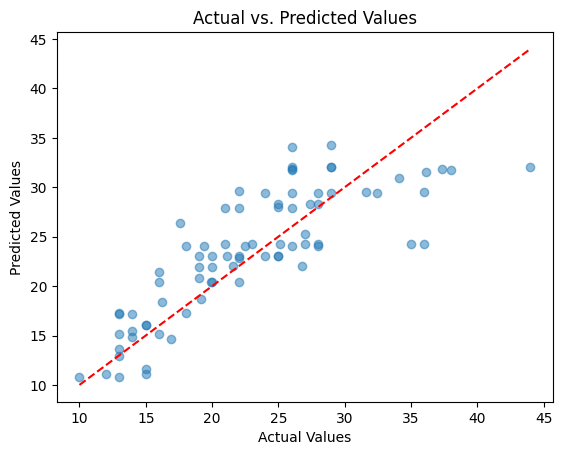

In [ ]:

df = sns.load_dataset('mpg').dropna()
X = df[['horsepower']].values
y = df['mpg'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
        'svr': SVR(),
        'knn': KNeighborsRegressor(),
        'lr': LinearRegression()
}

ensemble = VotingEnsembleRegressor(models)
ensemble.train(X_train, y_train)
print("Evaluation Metrics:", ensemble.evaluate(X_train, y_train, X_test, y_test))
ensemble.plot_results(X_test, y_test)


## Multiple feature regressioin

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

class VotingEnsembleRegressor:
    def __init__(self, models):
        """
        Initialize the ensemble with user-defined models.
        """
        self.models = models
        self.ensemble = None

    def train(self, x_train, y_train):
        """
        Train the voting ensemble with selected models.
        """
        estimators = [(name, model) for name, model in self.models.items()]
        self.ensemble = VotingRegressor(estimators=estimators)
        self.ensemble.fit(x_train, y_train)

    def evaluate(self, x_train, y_train, x_test, y_test):
        """
        Compute MSE and R² scores for train and test sets.
        """
        y_train_pred = self.ensemble.predict(x_train)
        y_test_pred = self.ensemble.predict(x_test)

        metrics = {
            "train_mse": mean_squared_error(y_train, y_train_pred),
            "train_r2": r2_score(y_train, y_train_pred),
            "test_mse": mean_squared_error(y_test, y_test_pred),
            "test_r2": r2_score(y_test, y_test_pred)
        }
        return metrics

    def plot_results(self, y_test, y_pred):
        """
        Plot actual vs. predicted values.
        """
        plt.scatter(y_test, y_pred, alpha=0.5)
        plt.xlabel("Actual Values")
        plt.ylabel("Predicted Values")
        plt.title("Actual vs. Predicted Values")
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')
        plt.show()

### Object Intantiation

Evaluation Metrics: {'train_mse': 14.991210100961466, 'train_r2': 0.7624204291414199, 'test_mse': 15.693974146386557, 'test_r2': 0.692519694129813}


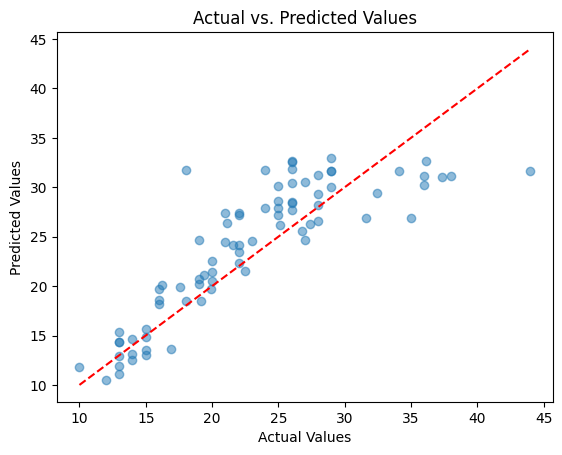

In [ ]:
df = sns.load_dataset('mpg').dropna()
X = df[['horsepower', 'weight', 'displacement']].values
y = df['mpg'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'svr': SVR(),
    'knn': KNeighborsRegressor(),
    'lr': LinearRegression()
}

ensemble = VotingEnsembleRegressor(models)
ensemble.train(X_train, y_train)
print("Evaluation Metrics:", ensemble.evaluate(X_train, y_train, X_test, y_test))
y_pred = ensemble.ensemble.predict(X_test)
ensemble.plot_results(y_test, y_pred)


# GUI

#### prepare the data set

In [10]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

In [11]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

##Run the code


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import ipywidgets as widgets
from IPython.display import display




def get_models():
    return {
        'Linear Regression': LinearRegression(),
        'Ridge': Ridge(),
        'Lasso': Lasso(),
        'ElasticNet': ElasticNet(),
        'SVR': SVR(),
        'Decision Tree': DecisionTreeRegressor(),
        'Random Forest': RandomForestRegressor(),
        'Gradient Boosting': GradientBoostingRegressor(),
        'AdaBoost': AdaBoostRegressor(),
        'Bagging': BaggingRegressor(),
        'Extra Trees': ExtraTreesRegressor(),
        'KNN': KNeighborsRegressor(),
        'MLP': MLPRegressor()
    }


models_dict = get_models()
model_selection_widgets = {}

for model_name in models_dict.keys():
    model_selection_widgets[model_name] = widgets.IntSlider(
        value=0, min=0, max=5, step=1,
        description=f'{model_name}',
        style={'description_width': 'initial'}
    )


voting_type = widgets.Dropdown(
    options=['hard', 'soft'],
    value='hard',
    description='Voting Type:',
    style={'description_width': 'initial'}
)

train_button = widgets.Button(description='Train Ensemble')
out = widgets.Output()


def train_voting_ensemble(selected_models, X_train, y_train):
    model_instances = []
    for name, count in selected_models.items():
        for i in range(count):
            model_instances.append((f'{name}_{i+1}', models_dict[name]))

    if not model_instances:
        return None

    ensemble = VotingRegressor(estimators=model_instances)
    ensemble.fit(X_train, y_train)
    return ensemble

def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.jet)
    scatter = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='coolwarm', edgecolor='k')
    plt.colorbar(label='Predicted Value')
    plt.title(title)
    plt.show()


def on_train_clicked(b):
    selected_models = {name: widget.value for name, widget in model_selection_widgets.items() if widget.value > 0}
    if not selected_models:
        with out:
            out.clear_output()
            print("Select at least one model!")
        return

    ensemble = train_voting_ensemble(selected_models, X_train, y_train)
    if ensemble is None:
        return

    y_train_pred = ensemble.predict(X_train)
    y_test_pred = ensemble.predict(X_test)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    with out:
        out.clear_output()
        print("Train MSE:", train_mse)
        print("Test MSE:", test_mse)
        print("Train R² Score:", train_r2)
        print("Test R² Score:", test_r2)

        plt.figure(figsize=(8, 6))
        plt.scatter(y_test, y_test_pred, alpha=0.6)
        plt.xlabel("Actual Values")
        plt.ylabel("Predicted Values")
        plt.title("Actual vs Predicted")
        plt.show()

        plot_decision_boundary(ensemble, X_train, y_train, "Decision Boundary")

train_button.on_click(on_train_clicked)


display(*model_selection_widgets.values(), voting_type, train_button, out)

IntSlider(value=0, description='Linear Regression', max=5, style=SliderStyle(description_width='initial'))

IntSlider(value=0, description='Ridge', max=5, style=SliderStyle(description_width='initial'))

IntSlider(value=0, description='Lasso', max=5, style=SliderStyle(description_width='initial'))

IntSlider(value=0, description='ElasticNet', max=5, style=SliderStyle(description_width='initial'))

IntSlider(value=0, description='SVR', max=5, style=SliderStyle(description_width='initial'))

IntSlider(value=0, description='Decision Tree', max=5, style=SliderStyle(description_width='initial'))

IntSlider(value=0, description='Random Forest', max=5, style=SliderStyle(description_width='initial'))

IntSlider(value=0, description='Gradient Boosting', max=5, style=SliderStyle(description_width='initial'))

IntSlider(value=0, description='AdaBoost', max=5, style=SliderStyle(description_width='initial'))

IntSlider(value=0, description='Bagging', max=5, style=SliderStyle(description_width='initial'))

IntSlider(value=0, description='Extra Trees', max=5, style=SliderStyle(description_width='initial'))

IntSlider(value=0, description='KNN', max=5, style=SliderStyle(description_width='initial'))

IntSlider(value=0, description='MLP', max=5, style=SliderStyle(description_width='initial'))

Dropdown(description='Voting Type:', options=('hard', 'soft'), style=DescriptionStyle(description_width='initi…

Button(description='Train Ensemble', style=ButtonStyle())

Output()